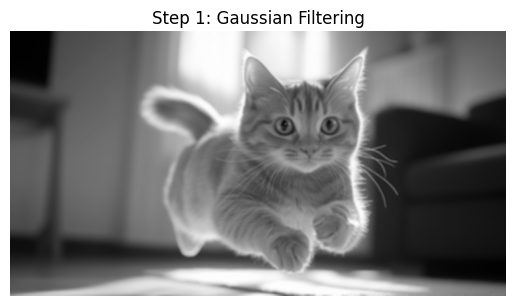

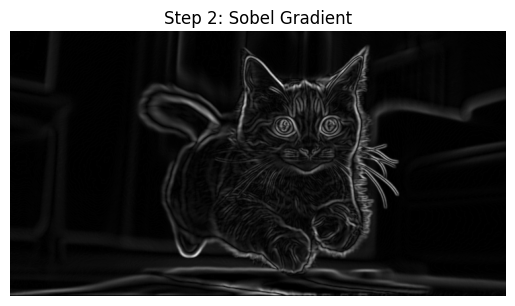

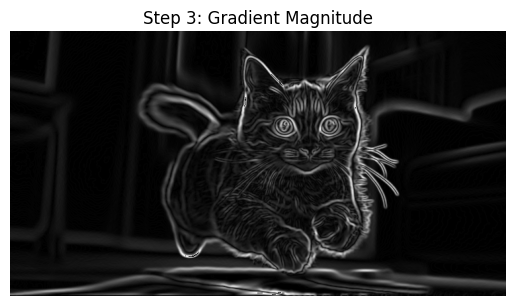

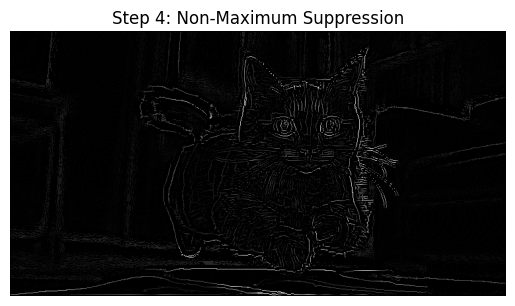

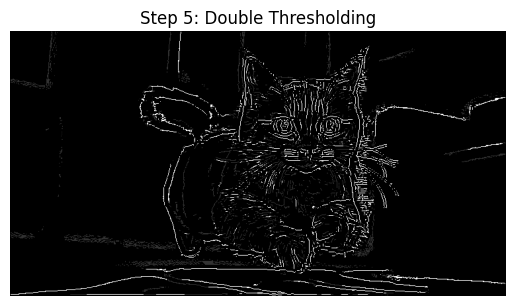

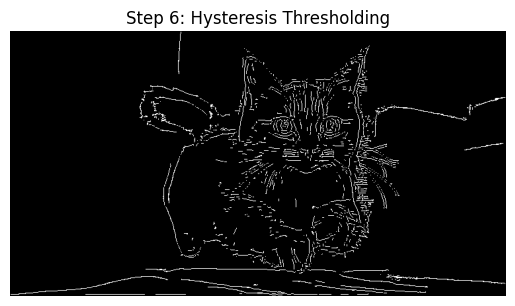

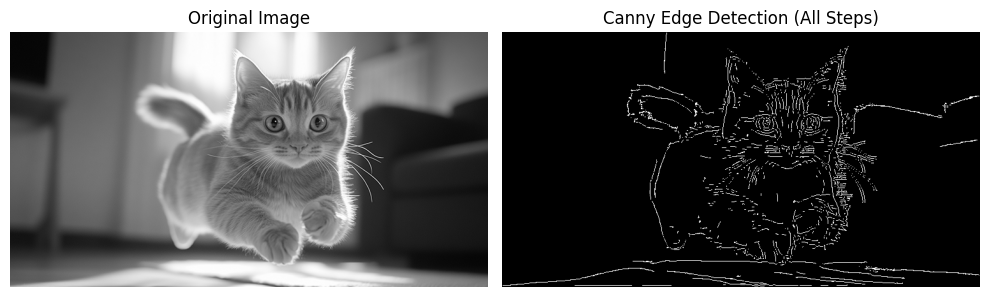

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def standard_canny(image, low_threshold, high_threshold):
    # Step 1: Gaussian Filtering (Noise Reduction)
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
    plt.figure()
    plt.imshow(blurred, cmap='gray')
    plt.title('Step 1: Gaussian Filtering')
    plt.axis('off')
    
    # Step 2: Sobel Gradient Operator (Image Derivatives)
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    plt.figure()
    plt.imshow(np.abs(grad_x) + np.abs(grad_y), cmap='gray')
    plt.title('Step 2: Sobel Gradient')
    plt.axis('off')
    
    # Step 3: Gradient Magnitude and Orientation Calculation
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_magnitude = np.uint8(gradient_magnitude)
    gradient_orientation = np.arctan2(grad_y, grad_x) * (180 / np.pi)
    plt.figure()
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title('Step 3: Gradient Magnitude')
    plt.axis('off')

    # Step 4: Non-Maximum Suppression (Edge Thinning)
    nms = np.zeros_like(gradient_magnitude)
    angle = gradient_orientation % 180
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]
            
            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                nms[i, j] = gradient_magnitude[i, j]
            else:
                nms[i, j] = 0
    plt.figure()
    plt.imshow(nms, cmap='gray')
    plt.title('Step 4: Non-Maximum Suppression')
    plt.axis('off')

    # Step 5: Double Thresholding
    high_threshold = np.max(nms) * 0.2
    low_threshold = high_threshold * 0.5
    strong_edges = (nms >= high_threshold).astype(np.uint8) * 255
    weak_edges = ((nms <= high_threshold) & (nms >= low_threshold)).astype(np.uint8) * 50
    plt.figure()
    plt.imshow(strong_edges + weak_edges, cmap='gray')
    plt.title('Step 5: Double Thresholding')
    plt.axis('off')

    # Step 6: Hysteresis Thresholding (Edge Connectivity)
    final_edges = np.copy(strong_edges)
    for i in range(1, nms.shape[0] - 1):
        for j in range(1, nms.shape[1] - 1):
            if weak_edges[i, j] == 50:
                if (255 in strong_edges[i-1:i+2, j-1:j+2]):
                    final_edges[i, j] = 255
                else:
                    final_edges[i, j] = 0
    plt.figure()
    plt.imshow(final_edges, cmap='gray')
    plt.title('Step 6: Hysteresis Thresholding')
    plt.axis('off')
    
    return final_edges
image = cv2.imread(r'C:\Users\M PAVANI\Downloads\cat-play.png', cv2.IMREAD_GRAYSCALE)

# all 6 Steps
final_edges = standard_canny(image, 50, 150)

# Final Result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_edges, cmap='gray')
plt.title('Canny Edge Detection (All Steps)')
plt.axis('off')

plt.tight_layout()
plt.show()


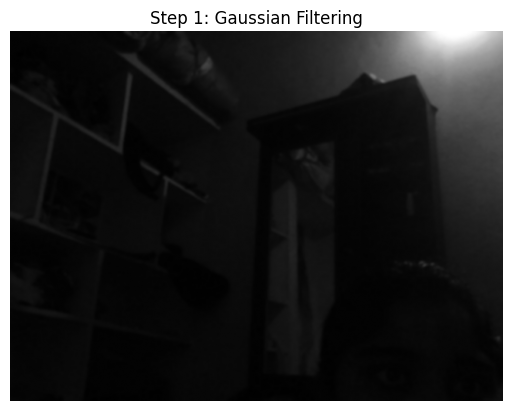

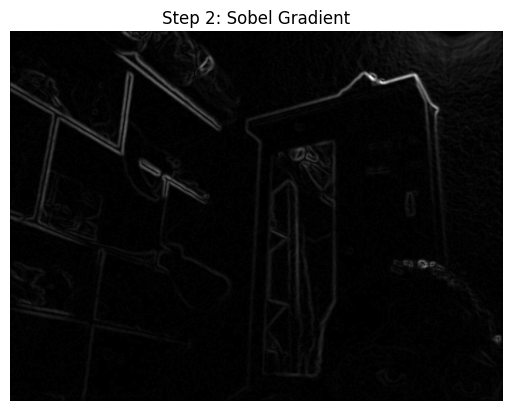

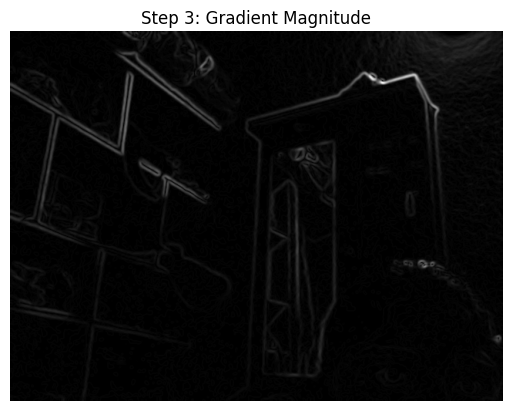

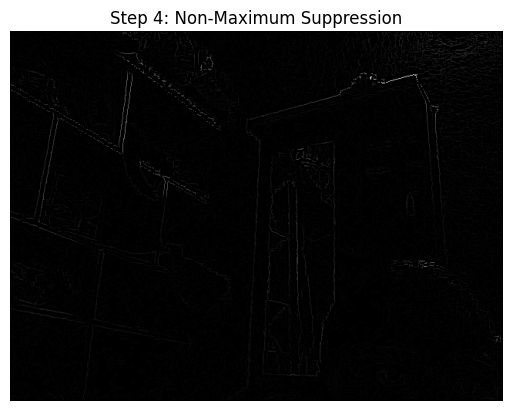

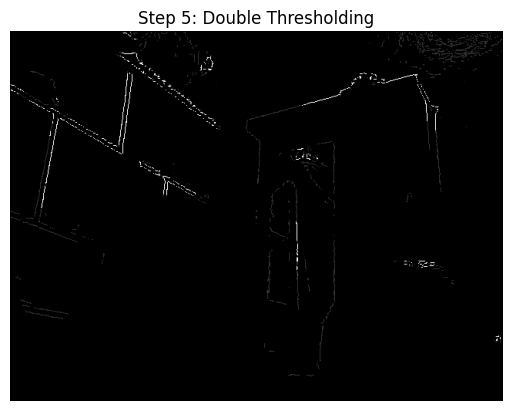

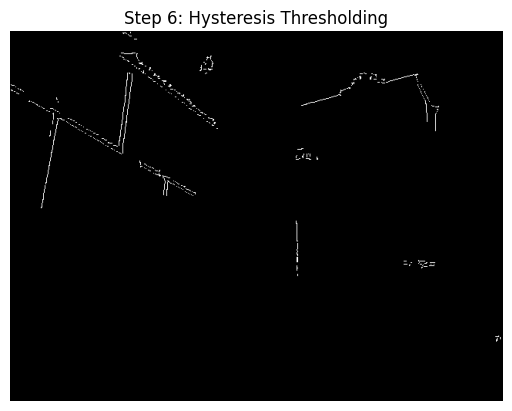

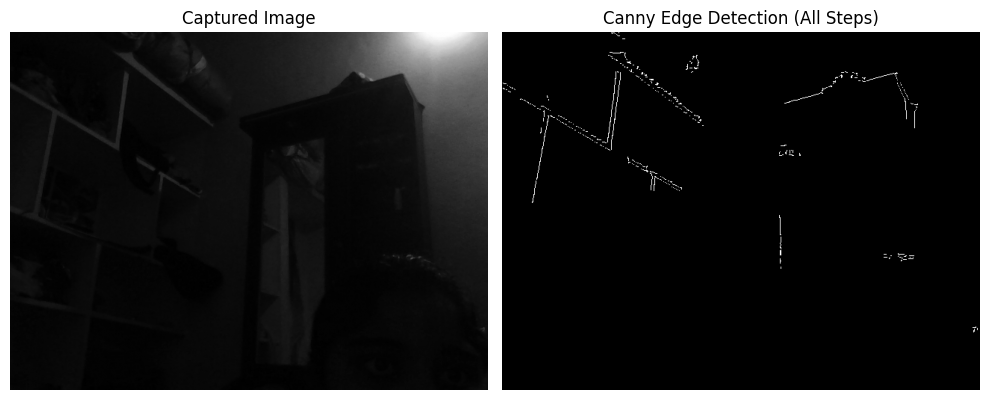

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for Standard Canny Edge Detection (Existing Method)
def standard_canny(image, low_threshold, high_threshold):
    # Step 1: Gaussian Filtering (Noise Reduction)
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
    plt.figure()
    plt.imshow(blurred, cmap='gray')
    plt.title('Step 1: Gaussian Filtering')
    plt.axis('off')
    
    # Step 2: Sobel Gradient Operator (Image Derivatives)
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    plt.figure()
    plt.imshow(np.abs(grad_x) + np.abs(grad_y), cmap='gray')
    plt.title('Step 2: Sobel Gradient')
    plt.axis('off')
    
    # Step 3: Gradient Magnitude and Orientation Calculation
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_magnitude = np.uint8(gradient_magnitude)
    gradient_orientation = np.arctan2(grad_y, grad_x) * (180 / np.pi)
    plt.figure()
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title('Step 3: Gradient Magnitude')
    plt.axis('off')

    # Step 4: Non-Maximum Suppression (Edge Thinning)
    nms = np.zeros_like(gradient_magnitude)
    angle = gradient_orientation % 180
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]
            
            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                nms[i, j] = gradient_magnitude[i, j]
            else:
                nms[i, j] = 0
    plt.figure()
    plt.imshow(nms, cmap='gray')
    plt.title('Step 4: Non-Maximum Suppression')
    plt.axis('off')

    # Step 5: Double Thresholding
    high_threshold = np.max(nms) * 0.2
    low_threshold = high_threshold * 0.5
    strong_edges = (nms >= high_threshold).astype(np.uint8) * 255
    weak_edges = ((nms <= high_threshold) & (nms >= low_threshold)).astype(np.uint8) * 50
    plt.figure()
    plt.imshow(strong_edges + weak_edges, cmap='gray')
    plt.title('Step 5: Double Thresholding')
    plt.axis('off')

    # Step 6: Hysteresis Thresholding (Edge Connectivity)
    final_edges = np.copy(strong_edges)
    for i in range(1, nms.shape[0] - 1):
        for j in range(1, nms.shape[1] - 1):
            if weak_edges[i, j] == 50:
                if (255 in strong_edges[i-1:i+2, j-1:j+2]):
                    final_edges[i, j] = 255
                else:
                    final_edges[i, j] = 0
    plt.figure()
    plt.imshow(final_edges, cmap='gray')
    plt.title('Step 6: Hysteresis Thresholding')
    plt.axis('off')
    
    return final_edges

# Capture image from Web Camera
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if ret:
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    final_edges = standard_canny(image, 50, 150)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Captured Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(final_edges, cmap='gray')
    plt.title('Canny Edge Detection (All Steps)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Failed to capture image from webcam")

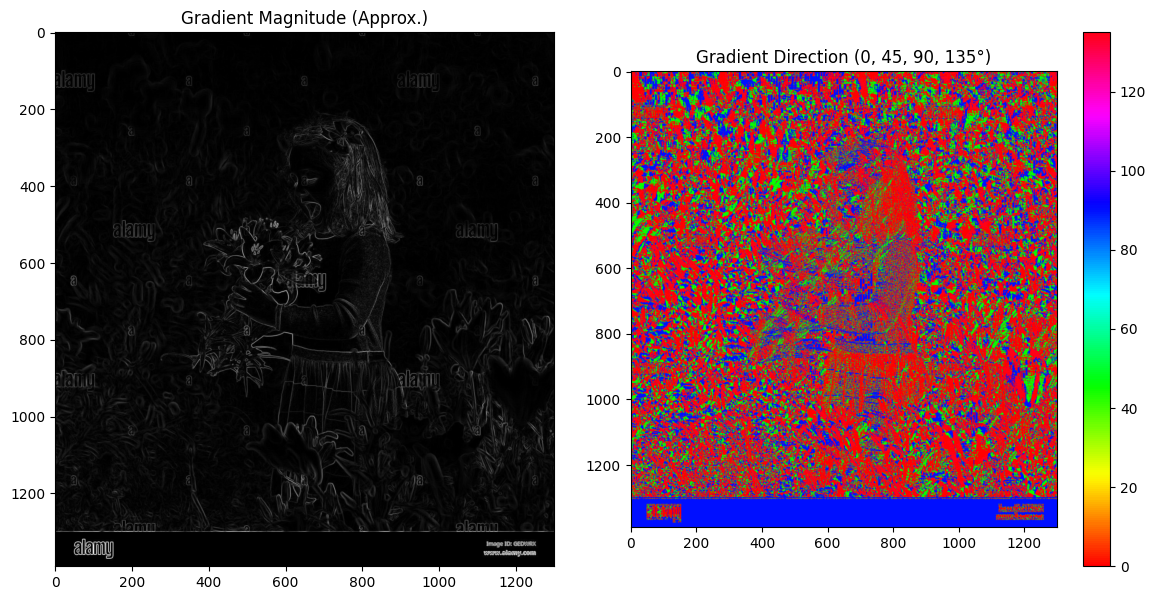

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hardware_friendly_gradient(image):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Sobel gradient in X and Y directions
    Mx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    My = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    abs_Mx = np.abs(Mx)
    abs_My = np.abs(My)
    diag = (abs_Mx + abs_My) / np.sqrt(2)

    # Hardware-friendly magnitude approximation
    magnitude = np.maximum.reduce([abs_Mx, abs_My, diag])

    # Direction approximation (4 orientations)
    direction = np.zeros_like(image, dtype=np.uint8)
    diag_max = (magnitude == diag)
    mx_max = (magnitude == abs_Mx)
    my_max = (magnitude == abs_My)

    same_sign = np.sign(Mx) == np.sign(My)
    direction[np.logical_and(diag_max, same_sign)] = 45
    direction[np.logical_and(diag_max, ~same_sign)] = 135
    direction[mx_max] = 0
    direction[my_max] = 90

    return magnitude, direction

# Load an image
image = cv2.imread(r"C:\Users\M PAVANI\Downloads\1.jpg")  # Replace with your image path

# Apply hardware-friendly gradient
magnitude, direction = hardware_friendly_gradient(image)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Gradient Magnitude (Approx.)")
plt.imshow(magnitude, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Gradient Direction (0, 45, 90, 135°)")
plt.imshow(direction, cmap='hsv')
plt.colorbar()
plt.tight_layout()
plt.show()


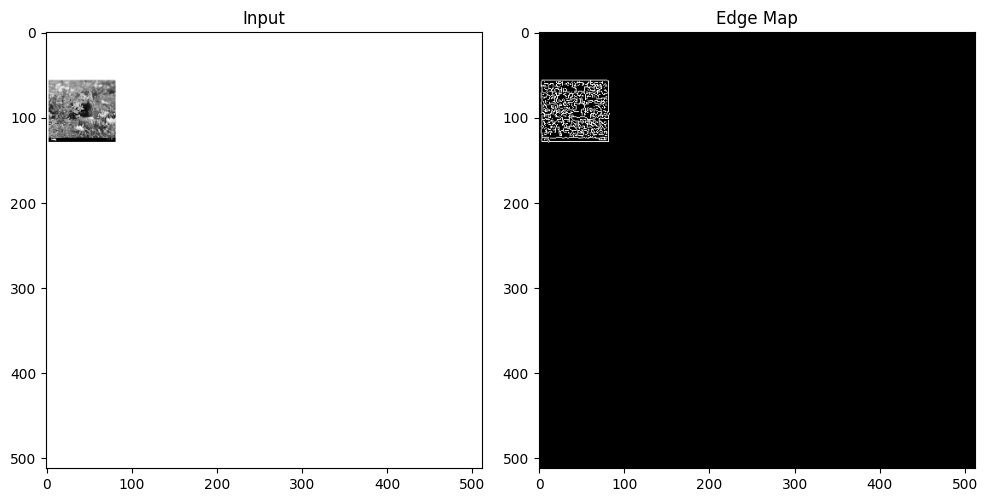

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants from Table III (example values per block type)
# Assume block types: [Uniform, Texture, Edge, Corner, Mixed, Complex]
BLOCK_CONSTANTS = {
    'uniform': 1.2,
    'texture': 1.4,
    'edge': 1.5,
    'corner': 1.3,
    'mixed': 1.35,
    'complex': 1.45
}

def classify_block(block):
    std = np.std(block)
    if std < 10:
        return 'uniform'
    elif std < 25:
        return 'texture'
    elif std < 40:
        return 'edge'
    elif std < 60:
        return 'corner'
    elif std < 80:
        return 'mixed'
    else:
        return 'complex'

def compute_block_thresholds(image, block_size=64):
    h, w = image.shape
    thresholds = np.zeros((h, w))
    
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            if block.size == 0:
                continue

            grad_x = cv2.Sobel(block, cv2.CV_64F, 1, 0, ksize=3)
            grad_y = cv2.Sobel(block, cv2.CV_64F, 0, 1, ksize=3)
            mag = np.sqrt(grad_x**2 + grad_y**2)
            M1 = np.mean(mag)

            block_type = classify_block(block)
            constant = BLOCK_CONSTANTS.get(block_type, 1.4)
            Th1 = constant * M1

            thresholds[i:i+block_size, j:j+block_size] = Th1

    return thresholds

def apply_simplified_canny(image, thresholds, low_ratio=0.4):
    edges = np.zeros_like(image)
    h, w = image.shape
    block_size = thresholds.shape[0] // (h // 64)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            if block.size == 0:
                continue

            Th1 = thresholds[i, j]
            Th2 = low_ratio * Th1

            canny_block = cv2.Canny(block, threshold1=Th2, threshold2=Th1)
            edges[i:i+block_size, j:j+block_size] = canny_block

    return edges

# Load grayscale image
image = cv2.imread(r"C:\Users\M PAVANI\Downloads\2.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))

# Step 1: Compute thresholds
threshold_map = compute_block_thresholds(image, block_size=64)

# Step 2: Apply Canny using block-wise thresholds
edge_output = apply_simplified_canny(image, threshold_map)

# Display result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Input')
plt.subplot(122), plt.imshow(edge_output, cmap='gray'), plt.title('Edge Map')
plt.tight_layout()
plt.show()


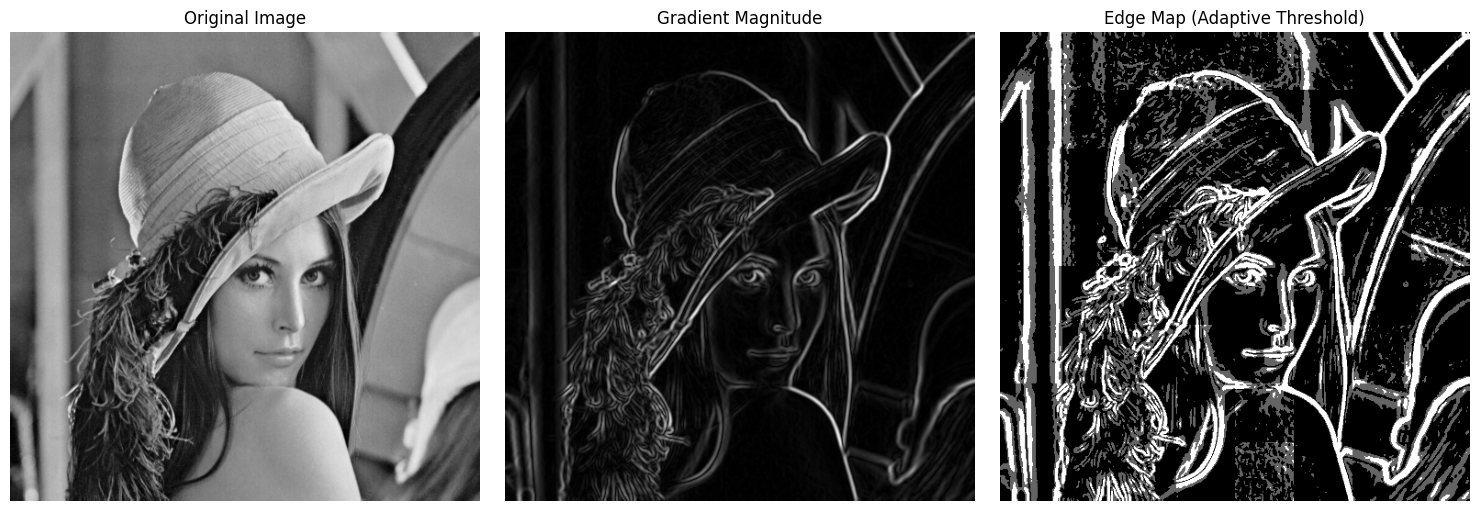

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

def load_image_grayscale(size=(512, 512)):
    try:
        # Try loading from local
        image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError
    except:
        # Load Lena image from web
        url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
        resp = urlopen(url)
        image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

    # Resize for uniformity
    return cv2.resize(image, size)

def compute_gradients(image):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
    
    # Compute gradients using Sobel operator
    Gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    Gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    
    # Gradient magnitude approximation using max(MX, MY, (MX+MY)/√2)
    absGx = np.abs(Gx)
    absGy = np.abs(Gy)
    abs45 = (absGx + absGy) / np.sqrt(2)
    grad_mag = np.maximum(np.maximum(absGx, absGy), abs45)

    return grad_mag, Gx, Gy

def classify_block(block):
    std = np.std(block)
    if std < 5:
        return "uniform"
    elif std < 15:
        return "slightly textured"
    elif std < 30:
        return "textured"
    else:
        return "highly textured"

def get_threshold_ratio(block_type):
    # Approximated constants from Table III
    ratios = {
        "uniform": 2.5,
        "slightly textured": 2.3,
        "textured": 2.0,
        "highly textured": 1.8
    }
    return ratios.get(block_type, 2.0)

def compute_block_thresholds(grad_mag, block_size=64):
    h, w = grad_mag.shape
    th_map = np.zeros_like(grad_mag)
    
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = grad_mag[y:y+block_size, x:x+block_size]
            if block.size == 0:
                continue
            block_type = classify_block(block)
            mean_val = np.mean(block)
            ratio = get_threshold_ratio(block_type)
            th1 = mean_val * ratio
            th_map[y:y+block_size, x:x+block_size] = th1

    return th_map

def canny_with_adaptive_threshold(image, grad_mag, threshold_map, Gx, Gy):
    h, w = image.shape
    edges = np.zeros((h, w), dtype=np.uint8)
    low_ratio = 0.4

    for y in range(h):
        for x in range(w):
            high = threshold_map[y, x]
            low = high * low_ratio
            if grad_mag[y, x] >= high:
                edges[y, x] = 255
            elif grad_mag[y, x] >= low:
                edges[y, x] = 100
            else:
                edges[y, x] = 0
    return edges

# Main Execution
image = load_image_grayscale()
grad_mag, Gx, Gy = compute_gradients(image)
threshold_map = compute_block_thresholds(grad_mag, block_size=64)
edges = canny_with_adaptive_threshold(image, grad_mag, threshold_map, Gx, Gy)

# Display Results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gradient Magnitude')
plt.imshow(grad_mag, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edge Map (Adaptive Threshold)')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
import cv2
import numpy as np

def energy_efficient_canny(image, low_threshold=50, high_threshold=150, gaussian_kernel=(5, 5), sigma=1.4):
    # Step 1: Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply Gaussian Filter (Energy-Efficient)
    blurred = cv2.GaussianBlur(gray, gaussian_kernel, sigma)

    # Step 3: Compute Gradients using Sobel Operator
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x) * 180 / np.pi
    direction[direction < 0] += 180

    # Step 4: Non-Maximum Suppression (NMS)
    nms = np.zeros_like(magnitude)
    H, W = magnitude.shape
    for i in range(1, H-1):
        for j in range(1, W-1):
            angle = direction[i, j]
            mag = magnitude[i, j]

            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                before = magnitude[i, j-1]
                after = magnitude[i, j+1]
            elif 22.5 <= angle < 67.5:
                before = magnitude[i-1, j+1]
                after = magnitude[i+1, j-1]
            elif 67.5 <= angle < 112.5:
                before = magnitude[i-1, j]
                after = magnitude[i+1, j]
            else:  # 112.5 <= angle < 157.5
                before = magnitude[i-1, j-1]
                after = magnitude[i+1, j+1]

            if mag >= before and mag >= after:
                nms[i, j] = mag

    # Step 5: Double Thresholding
    strong = 255
    weak = 50
    result = np.zeros_like(nms, dtype=np.uint8)
    strong_i, strong_j = np.where(nms >= high_threshold)
    weak_i, weak_j = np.where((nms >= low_threshold) & (nms < high_threshold))
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    # Step 6: Edge Tracking by Hysteresis
    for i in range(1, H-1):
        for j in range(1, W-1):
            if result[i, j] == weak:
                if np.any(result[i-1:i+2, j-1:j+2] == strong):
                    result[i, j] = strong
                else:
                    result[i, j] = 0

    return result

# === Usage Example ===
if __name__ == "__main__":
    input_image = cv2.imread(r"C:\Users\M PAVANI\Downloads\1.jpg")  # Replace with your image path
    edges = energy_efficient_canny(input_image)
    cv2.imshow("Energy Efficient Canny Edge Detection", edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

def computation_reuse_gaussian_filter(image, kernel_size=3, sigma=1.0):
    # Ensure grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create 1D Gaussian kernel
    g_kernel = cv2.getGaussianKernel(kernel_size, sigma).flatten()

    # Print the Gaussian kernel
    print("1D Gaussian Kernel:", g_kernel)

    # Check if kernel has 3 elements for indexing
    assert kernel_size == 3, "This implementation assumes a 3x3 kernel for reuse"

    # Precompute column ratios for reuse
    ratios = [g_kernel[1] / g_kernel[0], 1.0, g_kernel[1] / g_kernel[2]]

    # Image padding
    padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    output = np.zeros_like(image, dtype=np.float64)

    R_prev = None
    for y in range(1, padded.shape[0] - 1):
        # Row-wise weighted sum (1D convolution)
        R_curr = (
            g_kernel[0] * padded[y - 1, 1:-1] +
            g_kernel[1] * padded[y, 1:-1] +
            g_kernel[2] * padded[y + 1, 1:-1]
        )

        if R_prev is not None:
            # Apply reuse idea: combine current and previous row sums
            output[y - 1, :] = (
                ratios[0] * R_prev +
                ratios[1] * R_curr
            )

        R_prev = R_curr.copy()

    # Normalize and return
    output_image = np.uint8(np.clip(output, 0, 255))
    
    # Print a small section of input and output images for inspection
    print("\nSample Input Image Section (10x10):\n", image[:10, :10])
    print("\nSample Output Image Section (10x10):\n", output_image[:10, :10])

    return output_image

# Load image
image = cv2.imread(r"C:\Users\M PAVANI\Downloads\2.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Check the path.")

# Apply the proposed method
filtered_img = computation_reuse_gaussian_filter(image)

# Show the result
cv2.imshow('Input Image', image)
cv2.imshow('Filtered Image (Reuse-Based)', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1D Gaussian Kernel: [0.27406862 0.45186276 0.27406862]

Sample Input Image Section (10x10):
 [[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]

Sample Output Image Section (10x10):
 [[  0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]


In [ ]:
import cv2
import numpy as np
import urllib.request

def computation_reuse_gaussian_filter(image, kernel_size=3, sigma=1.0):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    g_kernel = cv2.getGaussianKernel(kernel_size, sigma).flatten()
    print("1D Gaussian Kernel:", g_kernel)

    assert kernel_size == 3, "This implementation assumes a 3x3 kernel for reuse"
    ratios = [g_kernel[1] / g_kernel[0], 1.0, g_kernel[1] / g_kernel[2]]

    padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    output = np.zeros_like(image, dtype=np.float64)

    R_prev = None
    for y in range(1, padded.shape[0] - 1):
        R_curr = (
            g_kernel[0] * padded[y - 1, 1:-1] +
            g_kernel[1] * padded[y, 1:-1] +
            g_kernel[2] * padded[y + 1, 1:-1]
        )

        if R_prev is not None:
            output[y - 1, :] = (
                ratios[0] * R_prev +
                ratios[1] * R_curr
            )

        R_prev = R_curr.copy()

    output_image = np.uint8(np.clip(output, 0, 255))

    print("\nSample Input Image Section (10x10):\n", image[:10, :10])
    print("\nSample Output Image Section (10x10):\n", output_image[:10, :10])

    return output_image

# Load image from URL
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

# Check if image loaded
if image is None:
    raise ValueError("Failed to load image from URL.")

# Apply the proposed method
filtered_img = computation_reuse_gaussian_filter(image)

# Show the result
cv2.imshow('Input Image (from URL)', image)
cv2.imshow('Filtered Image (Reuse-Based)', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1D Gaussian Kernel: [0.27406862 0.45186276 0.27406862]

Sample Input Image Section (10x10):
 [[169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [170 170 165 163 168 167 166 167 167 167]
 [167 167 170 165 167 169 167 164 167 169]
 [165 165 164 164 166 166 164 165 166 167]
 [164 164 165 165 167 167 166 165 170 165]
 [163 163 165 165 164 163 163 165 168 162]]

Sample Output Image Section (10x10):
 [[  0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]


In [ ]:
import cv2
import numpy as np
import urllib.request

def computation_reuse_gaussian_filter(image, kernel_size=3, sigma=1.0):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Create 1D Gaussian Kernel
    g_kernel = cv2.getGaussianKernel(kernel_size, sigma).flatten()
    print("1D Gaussian Kernel:", g_kernel)

    # Step 2: Precompute normalized reuse ratios
    assert kernel_size == 3, "This implementation assumes a 3x3 kernel for reuse"
    reuse_raw = [g_kernel[1] / g_kernel[0], 1.0]
    norm = sum(reuse_raw)
    ratios = [r / norm for r in reuse_raw]  # Normalize to keep values within 0-255
    print("Normalized Reuse Ratios:", ratios)

    # Step 3: Pad image for convolution
    padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    output = np.zeros_like(image, dtype=np.float64)

    # Step 4: Row-by-row processing using reuse
    R_prev = None
    for y in range(1, padded.shape[0] - 1):
        R_curr = (
            g_kernel[0] * padded[y - 1, 1:-1] +
            g_kernel[1] * padded[y, 1:-1] +
            g_kernel[2] * padded[y + 1, 1:-1]
        )

        if R_prev is not None:
            output[y - 1, :] = (
                ratios[0] * R_prev +
                ratios[1] * R_curr
            )

        R_prev = R_curr.copy()

    # Step 5: Normalize and convert to uint8
    output_image = np.uint8(np.clip(output, 0, 255))

    # Step 6: Print image patches
    print("\nSample Input Image Section (10x10):\n", image[:10, :10])
    print("\nSample Output Image Section (10x10):\n", output_image[:10, :10])

    return output_image

# 🔗 Step 0: Load image from URL
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Failed to load image from URL.")

# ▶️ Run the filter
filtered_img = computation_reuse_gaussian_filter(image)

# 🖼️ Show images
cv2.imshow('Input Image', image)
cv2.imshow('Filtered Image (Reuse-Based)', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1D Gaussian Kernel: [0.27406862 0.45186276 0.27406862]
Normalized Reuse Ratios: [np.float64(0.6224593312018545), np.float64(0.3775406687981454)]

Sample Input Image Section (10x10):
 [[169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [169 169 168 167 169 164 170 167 170 167]
 [170 170 165 163 168 167 166 167 167 167]
 [167 167 170 165 167 169 167 164 167 169]
 [165 165 164 164 166 166 164 165 166 167]
 [164 164 165 165 167 167 166 165 170 165]
 [163 163 165 165 164 163 163 165 168 162]]

Sample Output Image Section (10x10):
 [[  0   0   0   0   0   0   0   0   0   0]
 [168 168 168 167 168 163 170 167 170 167]
 [168 168 168 167 168 163 170 167 170 167]
 [168 168 168 167 168 163 170 167 170 167]
 [169 169 167 166 168 164 169 167 169 167]
 [169 169 167 165 168 165 168 166 168 167]
 [168 168 167 164 167 167 166 165 167 167]
 [166 166 166 164 166 167 165 164 166 167]
 [1

In [6]:
import cv2
import numpy as np
def computation_reuse_gaussian_filter(image, kernel_size=3, sigma=1.0):
    # Ensure grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create 1D Gaussian kernel
    g_kernel = cv2.getGaussianKernel(kernel_size, sigma).flatten()

    # Check if kernel has 3 elements for indexing
    assert kernel_size == 3, "This implementation assumes a 3x3 kernel for reuse"

    # Precompute column ratios for reuse
    ratios = [g_kernel[1] / g_kernel[0], 1.0, g_kernel[1] / g_kernel[2]]

    # Image padding
    padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    output = np.zeros_like(image, dtype=np.float64)

    R_prev = None
    for y in range(1, padded.shape[0] - 1):
        # Row-wise weighted sum (1D convolution)
        R_curr = (
            g_kernel[0] * padded[y - 1, 1:-1] +
            g_kernel[1] * padded[y, 1:-1] +
            g_kernel[2] * padded[y + 1, 1:-1]
        )

        if R_prev is not None:
            # Apply reuse idea: combine current and previous row sums
            output[y - 1, :] = (
                ratios[0] * R_prev +
                ratios[1] * R_curr
            )

        R_prev = R_curr.copy()

    # Normalize and return
    return np.uint8(np.clip(output, 0, 255))
image = cv2.imread(r"C:\Users\M PAVANI\Downloads\1.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("oi",image)
if image is None:
    raise ValueError("Image not found. Check the path.")

# Apply the proposed method
filtered_img = computation_reuse_gaussian_filter(image)

# Show the result
cv2.imshow('Filtered Image (Reuse-Based)', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
